## **Introduction**:

> #### *Problem Statement*:
> >Farmers often lack the expertise to identify plant diseases accurately based on visual symptoms. This leads to incorrect or delayed interventions, exacerbating crop damage and economic losses. Additionally, dependence on laboratory testing is impractical and costly for small-scale farmers.

>#### *Objective*:
>>To create a system that accurately identifies plant diseases at an early stage using image-based analysis.

>#### *Data Source*:
>>The project uses the Plant Village Dataset obtained from Kaggle, which consists of 7397 images of healthy and diseased plant leaves.

>#### *Outcome*:
>>Accurately classify healthy and diseased leaves for various crop. So diseases will be detected at an early stage which will reduce crop damage.Hence this model can be used for any web application for Plant Disease detection system.


# **PLANT DISEASE DETECTION SYSTEM**

###  **1.IMPORTING ALL THE REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import os
from tensorflow.keras.utils import image_dataset_from_directory
from matplotlib import pyplot as plt
import seaborn as sns
import math
from tensorflow import keras
from tensorflow.keras import layers,models 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import random
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
import random
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### **2. EXPLORATORY DATA ANALYSIS**

#### **a) Plant Disease Dataset path**

In [2]:
dataset_base_path = os.listdir("/kaggle/input/plantleaf/PlantLeafData")
dataset_base_path

['Validation', 'Test', 'Train']

### **b) Printing the diseases name of each plant**

In [3]:

dataset_path = "/kaggle/input/plantleaf/PlantLeafData"
train_path = os.path.join(dataset_path, "Train")  
class_names = sorted(os.listdir(train_path)) 

print("Classes in the dataset:")
for i, class_name in enumerate(class_names, 1):
    print(f"{i}. {class_name}")


Classes in the dataset:
1. Apple_Apple Scab
2. Apple_Black Rot
3. Apple_Cedar Apple Rust
4. Apple_Healthy
5. Cherry_Healthy
6. Cherry_Powdery Mildew
7. Corn_Cercospora Leaf Spot
8. Corn_Common Rust
9. Corn_Healthy
10. Corn_Northern Leaf Blight
11. Grape_Black Rot
12. Grape_Esca (Black Measles)
13. Grape_Healthy
14. Grape_Leaf Blight
15. Peach_Bacterial Spot
16. Peach_Healthy
17. Potato_Early Blight
18. Potato_Healthy
19. Potato_Late Blight
20. Strawberry_Healthy
21. Strawberry_Leaf Scorch
22. Tomato_Bacterial Spot
23. Tomato_Early Blight
24. Tomato_Healthy
25. Tomato_Late Blight
26. Tomato_Septoria Leaf Spot
27. Tomato_Yellow Leaf Curl Virus


#### **c) Total images in the Training , Validation and Test set**

In [4]:

dataset_path = "/kaggle/input/plantleaf/PlantLeafData"
train_path = os.path.join(dataset_path, "Train")
val_path = os.path.join(dataset_path, "Validation")
test_path = os.path.join(dataset_path, "Test")


def count_images(directory):
    total_images = 0
    for class_folder in os.listdir(directory):  
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path): 
            total_images += len(os.listdir(class_path))  
    return total_images


train_images = count_images(train_path)
val_images = count_images(val_path)
test_images = count_images(test_path)


print(f"Total images in Training Set: {train_images}")
print(f"Total images in Validation Set: {val_images}")
print(f"Total images in Test Set: {test_images}")
print(f"Total images in the dataset: {train_images + val_images + test_images}")


Total images in Training Set: 5000
Total images in Validation Set: 1908
Total images in Test Set: 489
Total images in the dataset: 7397


#### **d) Printing the information about the Training set, the directories and the images**

In [5]:

dataset_path = "/kaggle/input/plantleaf/PlantLeafData"
train_path = os.path.join(dataset_path, "Train")


def get_training_info(directory):
    print(f"Training Set Directory: {directory}")
    print("\nClasses and Image Counts:")
    
    class_info = []  
    total_images = 0

    for class_folder in sorted(os.listdir(directory)):  
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):  
            num_images = len(os.listdir(class_path))  
            total_images += num_images
            class_info.append((class_folder, num_images))

    
    for i, (class_name, img_count) in enumerate(class_info, 1):
        print(f"{i}. {class_name}: {img_count} images")

   
    print(f"\nTotal Classes: {len(class_info)}")
    print(f"Total Images in Training Set: {total_images}")


get_training_info(train_path)


Training Set Directory: /kaggle/input/plantleaf/PlantLeafData/Train

Classes and Image Counts:
1. Apple_Apple Scab: 198 images
2. Apple_Black Rot: 63 images
3. Apple_Cedar Apple Rust: 111 images
4. Apple_Healthy: 99 images
5. Cherry_Healthy: 81 images
6. Cherry_Powdery Mildew: 99 images
7. Corn_Cercospora Leaf Spot: 81 images
8. Corn_Common Rust: 144 images
9. Corn_Healthy: 180 images
10. Corn_Northern Leaf Blight: 189 images
11. Grape_Black Rot: 68 images
12. Grape_Esca (Black Measles): 50 images
13. Grape_Healthy: 100 images
14. Grape_Leaf Blight: 132 images
15. Peach_Bacterial Spot: 228 images
16. Peach_Healthy: 130 images
17. Potato_Early Blight: 320 images
18. Potato_Healthy: 370 images
19. Potato_Late Blight: 310 images
20. Strawberry_Healthy: 490 images
21. Strawberry_Leaf Scorch: 500 images
22. Tomato_Bacterial Spot: 280 images
23. Tomato_Early Blight: 170 images
24. Tomato_Healthy: 117 images
25. Tomato_Late Blight: 140 images
26. Tomato_Septoria Leaf Spot: 140 images
27. Toma

###  **e) Plotting the total number of images of each plant directory**

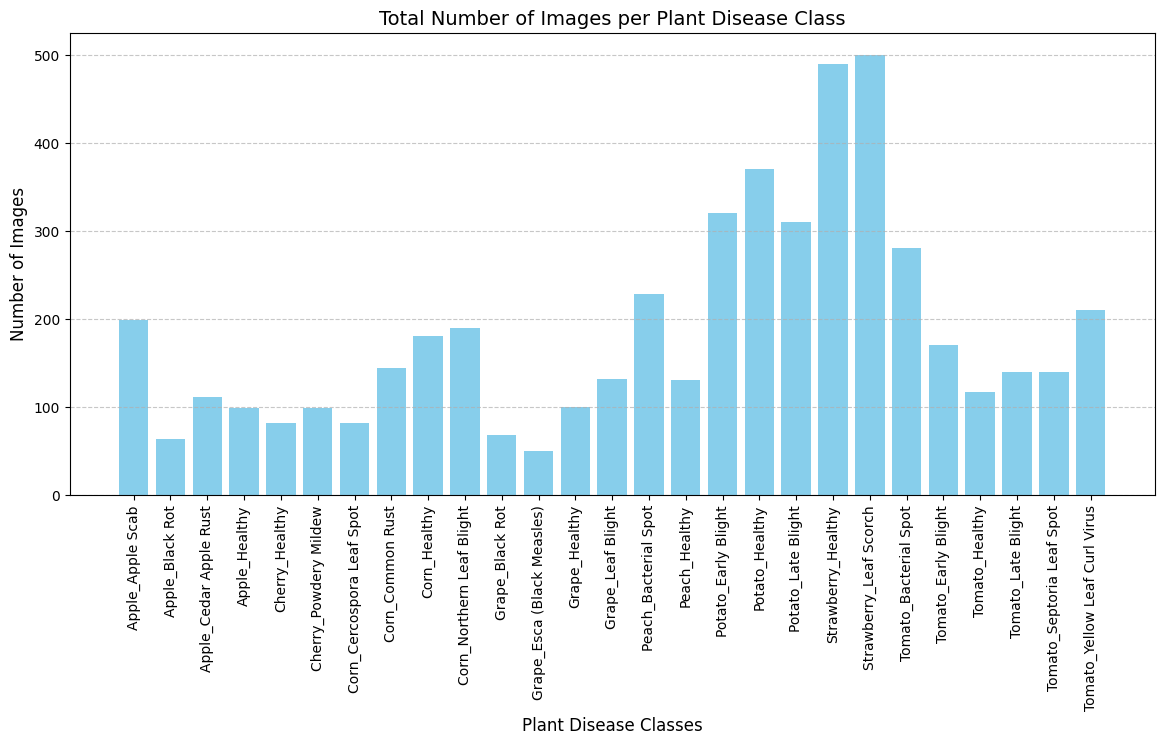

In [6]:
dataset_path = "/kaggle/input/plantleaf/PlantLeafData"
train_path = os.path.join(dataset_path, "Train")


def get_class_counts(directory):
    class_counts = {}  
    for class_folder in sorted(os.listdir(directory)):  
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):  
            class_counts[class_folder] = len(os.listdir(class_path))  
    return class_counts


class_counts = get_class_counts(train_path)


plt.figure(figsize=(14, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel("Plant Disease Classes", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Total Number of Images per Plant Disease Class", fontsize=14)
plt.xticks(rotation=90)  
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


###  **f) Plotting the images of each plant directory**

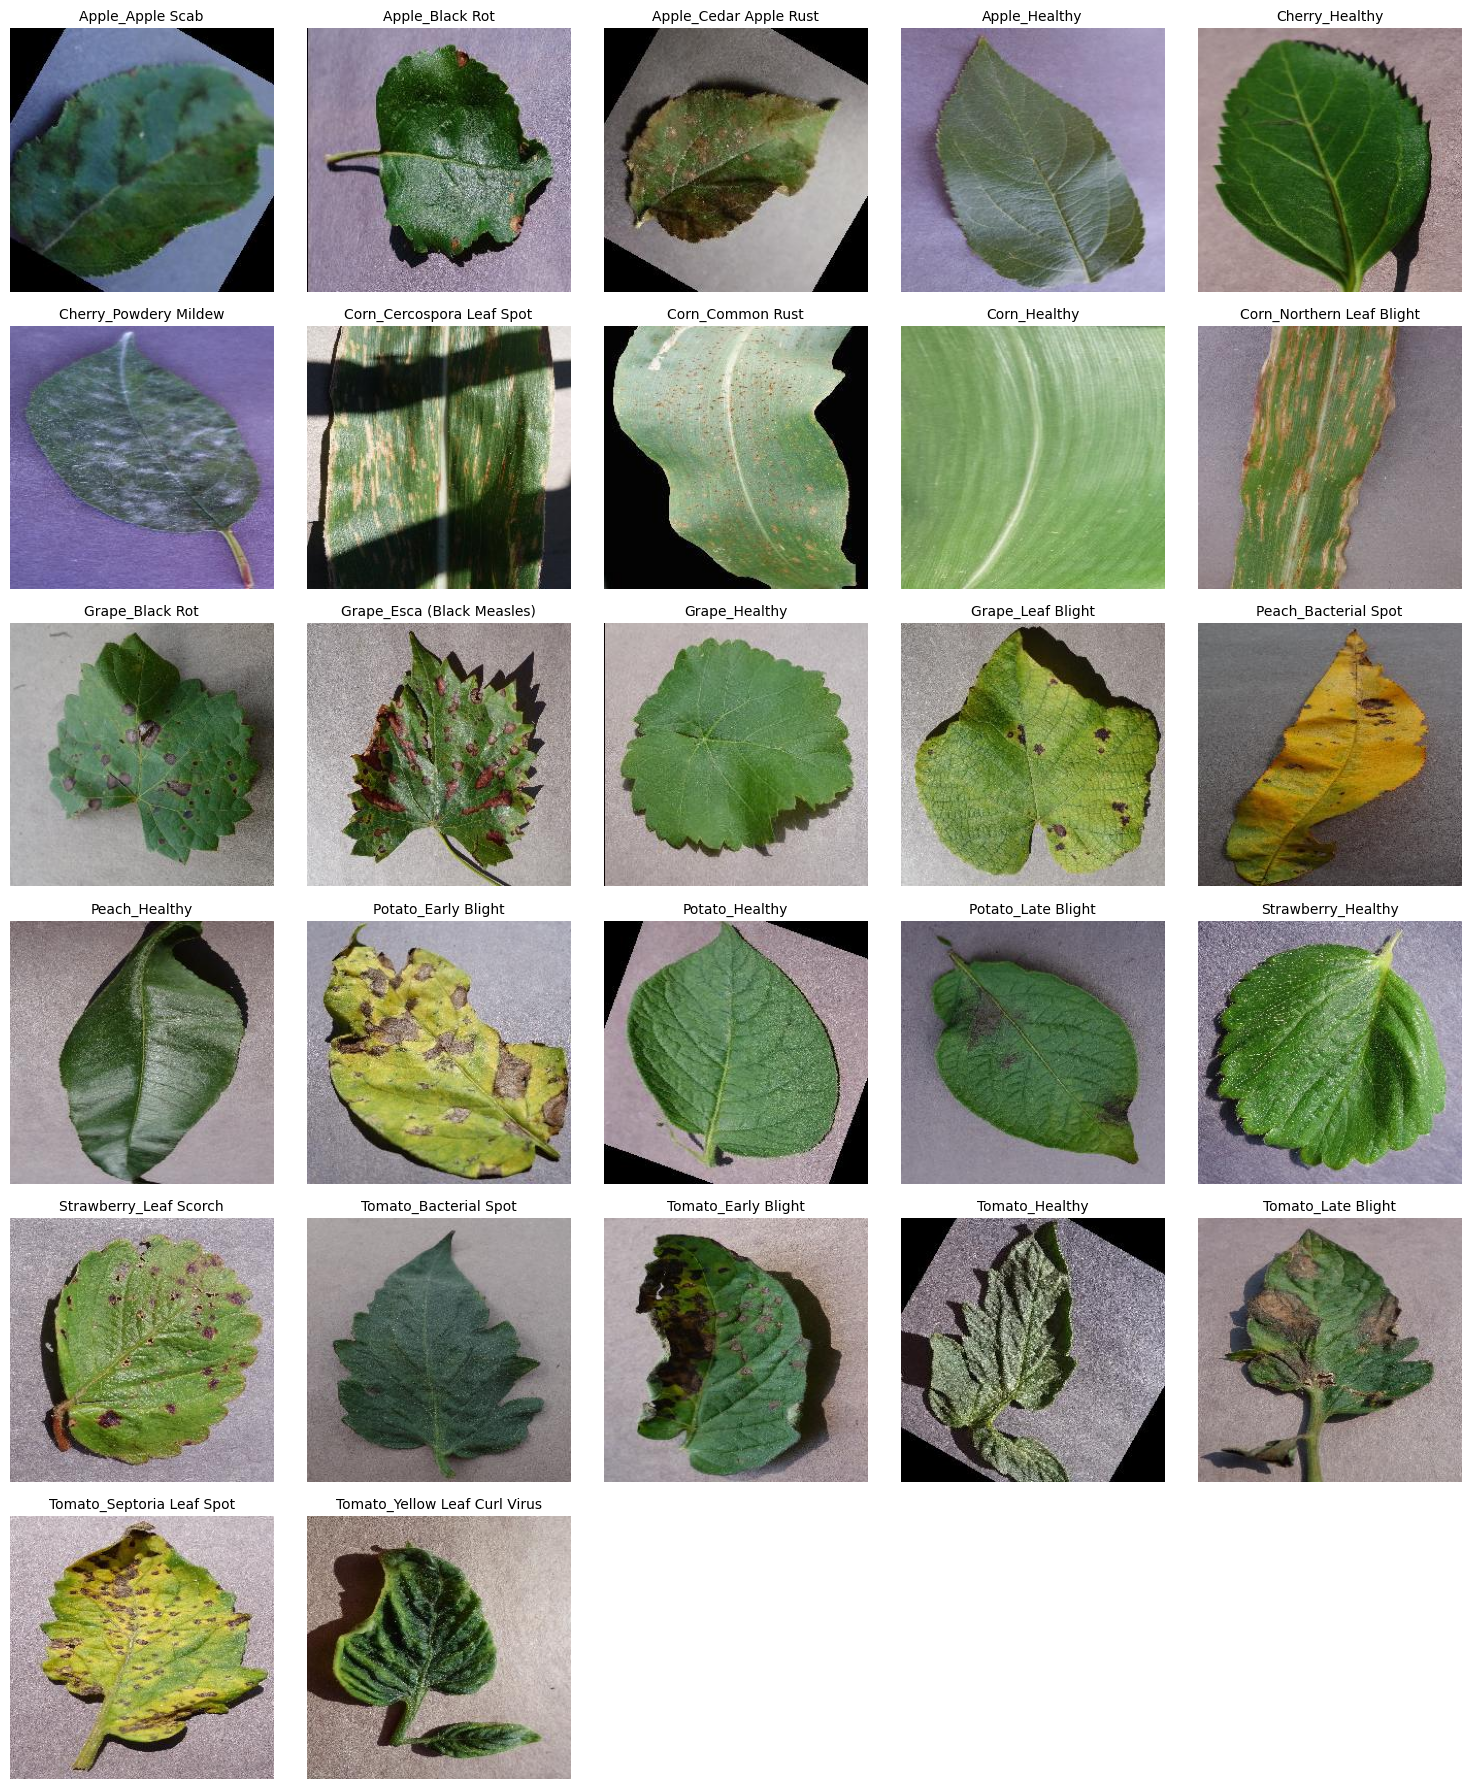

In [7]:

dataset_path = "/kaggle/input/plantleaf/PlantLeafData"
train_path = os.path.join(dataset_path, "Train")


def get_sample_images(directory):
    sample_images = {}  
    for class_folder in sorted(os.listdir(directory)):  
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path): 
            images = os.listdir(class_path)  
            if images: 
                sample_images[class_folder] = os.path.join(class_path, random.choice(images))
    return sample_images


sample_images = get_sample_images(train_path)


num_classes = len(sample_images)
cols = 5  
rows = (num_classes // cols) + 1 

plt.figure(figsize=(15, rows * 3))

for i, (class_name, img_path) in enumerate(sample_images.items()):
    img = cv2.imread(img_path)  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(class_name, fontsize=10)
    plt.axis("off")  

plt.tight_layout()
plt.show()


### **g) Plotting the standardized images for random plant leaf images** 

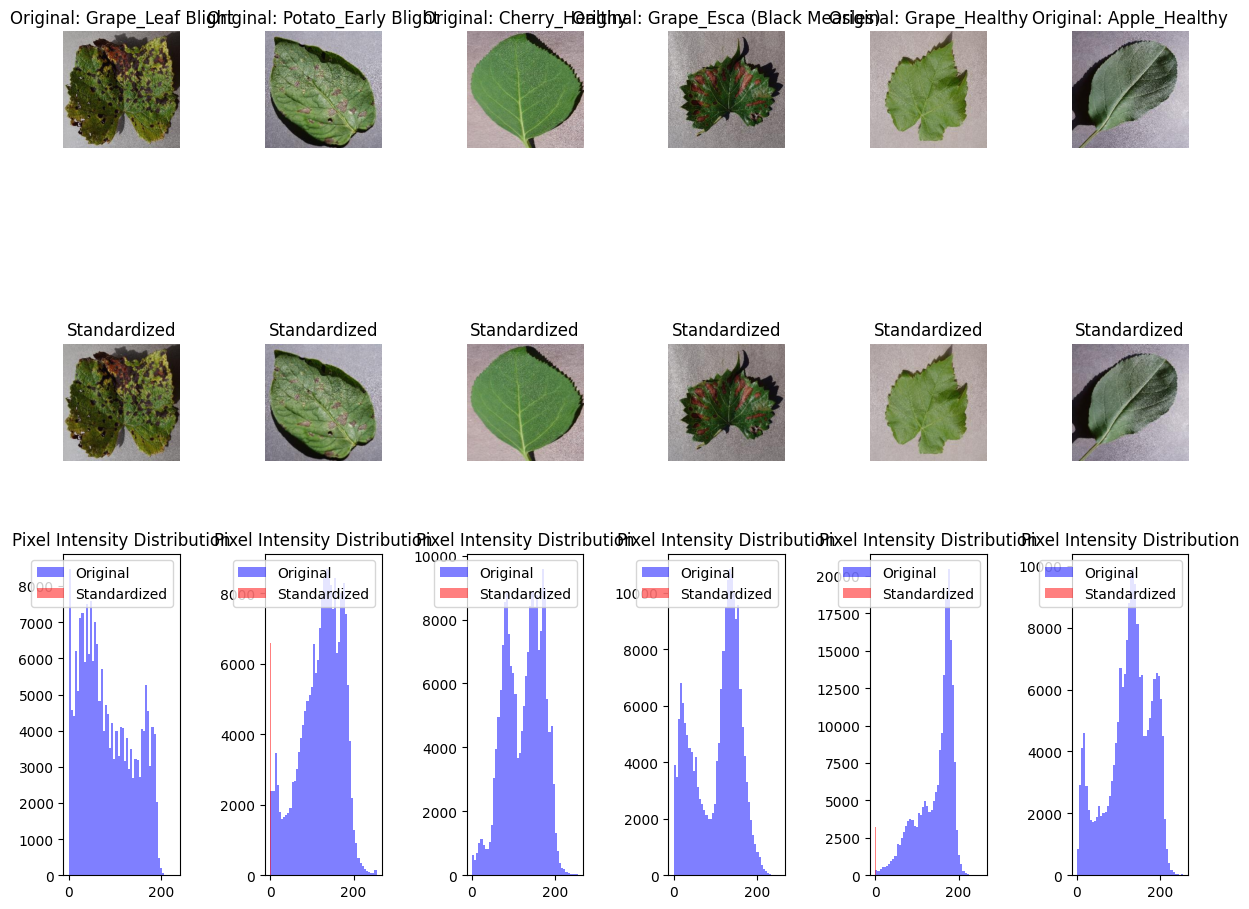

In [9]:

dataset_path = "/kaggle/input/plantleaf/PlantLeafData"
train_path = os.path.join(dataset_path, "Train")


img_height = 224
img_width = 224


def get_random_images(directory, num_images=5):
    image_paths = []
    class_names = []
    
    class_folders = sorted(os.listdir(directory))  
    selected_classes = random.sample(class_folders, num_images)  

    for class_folder in selected_classes:
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            if images:
                img_path = os.path.join(class_path, random.choice(images))
                image_paths.append(img_path)
                class_names.append(class_folder)

    return image_paths, class_names


image_paths, class_names = get_random_images(train_path, num_images=6)

# Plot original vs standardized images + histogram
plt.figure(figsize=(12, 10))

for i, img_path in enumerate(image_paths):
   
    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  
    
   
    resized_img = cv2.resize(original_img, (img_width, img_height))
    standardized_img = resized_img / 255.0  
    # Plot original image
    plt.subplot(3, len(image_paths), i + 1)
    plt.imshow(original_img)
    plt.title(f"Original: {class_names[i]}")
    plt.axis("off")

    # Plot standardized image
    plt.subplot(3, len(image_paths), i + 1 + len(image_paths))
    plt.imshow(standardized_img)
    plt.title(f"Standardized")
    plt.axis("off")

    # Plot pixel intensity histogram
    plt.subplot(3, len(image_paths), i + 1 + 2 * len(image_paths))
    plt.hist(original_img.ravel(), bins=50, alpha=0.5, label="Original", color="blue")
    plt.hist(standardized_img.ravel(), bins=50, alpha=0.5, label="Standardized", color="red")
    plt.title("Pixel Intensity Distribution")
    plt.legend()

plt.tight_layout()
plt.show()


###  **2. MODEL DEVELOPMENT**

### **a) Data Augmentation and creating Train , Test and Validation Generator for Custom CNN Architecture**

In [12]:
img_height, img_width = 150, 150  
batch_size = 32
num_classes = 27  

# Data augmentation and preprocessing for training, validation, and testing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Custom CNN model 
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    # Flattening layer
    layers.Flatten(),
    
    # Fully connected layers
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  
    
    # Output layer
    layers.Dense(num_classes, activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])


model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test accuracy: {test_acc:.4f}")



Found 5000 images belonging to 27 classes.
Found 1908 images belonging to 27 classes.
Found 489 images belonging to 27 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 27)                  │          13,851 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,047,515 (72.66 MB)

 Trainable params: 19,047,515 (72.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 56s 315ms/step - accuracy: 0.1552 - loss: 3.0182 - val_accuracy: 0.3077 - val_loss: 2.4684
Epoch 2/30
  1/156 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4375 - loss: 1.9524

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4375 - loss: 1.9524 - val_accuracy: 0.3500 - val_loss: 2.3613
Epoch 3/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 32s 195ms/step - accuracy: 0.4556 - loss: 1.8803 - val_accuracy: 0.4873 - val_loss: 1.8085
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 121us/step - accuracy: 0.5625 - loss: 1.6308 - val_accuracy: 0.4500 - val_loss: 2.1408
Epoch 5/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 31s 193ms/step - accuracy: 0.5830 - loss: 1.4066 - val_accuracy: 0.5636 - val_loss: 1.4353
Epoch 6/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - accuracy: 0.7500 - loss: 0.9449 - val_accuracy: 0.7500 - val_loss: 0.8537
Epoch 7/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 32s 196ms/step - accuracy: 0.6243 - loss: 1.2070 - val_accuracy: 0.5540 - val_loss: 1.6245
Epoch 8/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 123us/step - accuracy: 0.7188 - loss: 1.1142 - val_accuracy: 0.7000 - val_loss: 1.2161
Epoch 9/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 32s 193ms/step - accuracy: 0.6681 - loss: 1.0813 - val_accur

##### **Since the train accuracy is 78 and test accuracy is 56 i.e low and validation loss was high and even after Model Tuning like early stopping ,Reduce LR On Plateau, Dropout, Batch Normalization there was not much improvement in the model. So moving on to Transfer Learning ( using Pretrained models)**

### **b) Transfer Learning - VGG16**

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
img_height = 224
img_width = 224
batch_size = 32


train_dir = "/kaggle/input/plantleaf/PlantLeafData/Train"
val_dir = "/kaggle/input/plantleaf/PlantLeafData/Validation"
test_dir = "/kaggle/input/plantleaf/PlantLeafData/Test"

# ImageDataGenerator for preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load pre-trained VGG16 without top layers
base_model = VGG16(input_shape=(img_height, img_width, 3),
                   include_top=False,  
                   weights='imagenet')

# Freeze the convolutional base
base_model.trainable = False

# Building the custom model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#  model summary
model.summary()

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Found 5000 images belonging to 27 classes.
Found 1908 images belonging to 27 classes.
Found 489 images belonging to 27 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 27)                  │          13,851 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,991,195 (57.19 MB)

 Trainable params: 276,507 (1.05 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 70s 374ms/step - accuracy: 0.2303 - loss: 2.8192 - val_accuracy: 0.4142 - val_loss: 2.0738
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.4375 - loss: 2.0636 - val_accuracy: 0.5000 - val_loss: 1.9947
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 57s 352ms/step - accuracy: 0.5346 - loss: 1.6711 - val_accuracy: 0.5932 - val_loss: 1.4344
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.4688 - loss: 1.6352 - val_accuracy: 0.4000 - val_loss: 1.5043
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 58s 356ms/step - accuracy: 0.6408 - loss: 1.2483 - val_accuracy: 0.6139 - val_loss: 1.1872
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.7188 - loss: 0.9318 - val_accuracy: 0.6000 - val_loss: 1.0524
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 58s 356ms/step - accuracy: 0.6952 - loss: 1.0368 - val_accuracy: 0.6986 - val_loss: 0.9702
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.7500 - loss: 0.9141

### **c) Model Tuning**

In [15]:
# Unfreeze some layers of VGG16 for fine-tuning
base_model.trainable = True

# Unfreeze the last few blocks 
fine_tune_at = 15  # Unfreeze layers after the 15th layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

#re-compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])



### **d) Model Training after Fine Tuning**

In [16]:

history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,  
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 63s 361ms/step - accuracy: 0.7794 - loss: 0.7205 - val_accuracy: 0.7733 - val_loss: 0.6635
Epoch 2/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.5237 - val_accuracy: 0.6500 - val_loss: 0.8089
Epoch 3/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 57s 350ms/step - accuracy: 0.8223 - loss: 0.5399 - val_accuracy: 0.8252 - val_loss: 0.5309
Epoch 4/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.6562 - loss: 0.7037 - val_accuracy: 0.8500 - val_loss: 0.5148
Epoch 5/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 58s 353ms/step - accuracy: 0.8538 - loss: 0.4629 - val_accuracy: 0.8210 - val_loss: 0.4995
Epoch 6/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.8125 - loss: 0.4182 - val_accuracy: 0.9500 - val_loss: 0.2670
Epoch 7/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 58s 355ms/step - accuracy: 0.8742 - loss: 0.4060 - val_accuracy: 0.8326 - val_loss: 0.4749
Epoch 8/15
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 1.0000 - loss: 0.1715 

###  Training Accuracy : 90
###  Validation Accuracy : 87

### **e) Plotting Accuracy and Loss**

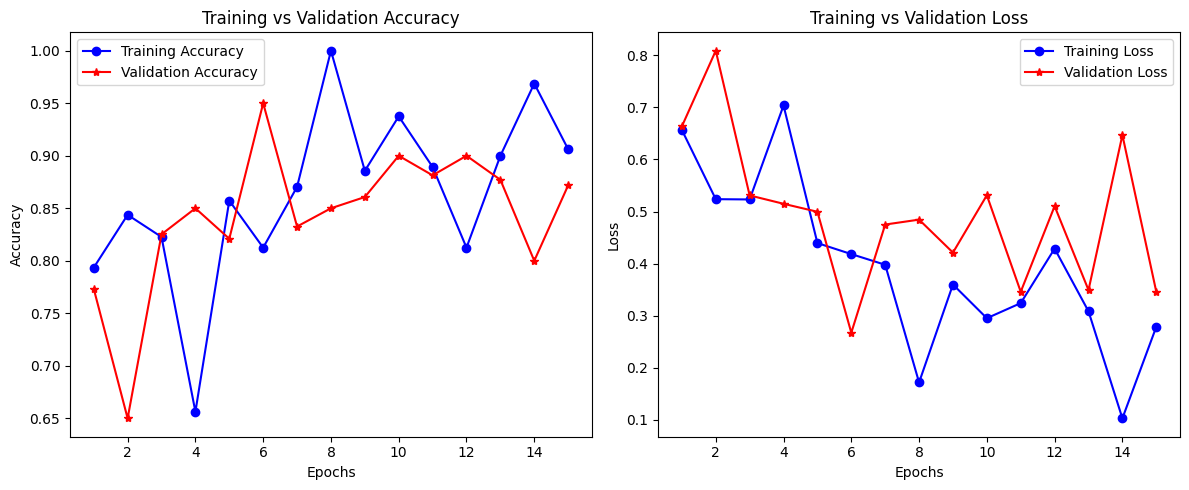

In [17]:
import matplotlib.pyplot as plt

train_acc = history_finetune.history['accuracy']
val_acc = history_finetune.history['val_accuracy']
train_loss = history_finetune.history['loss']
val_loss = history_finetune.history['val_loss']

epochs = range(1, len(train_acc) + 1)  

#Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label="Training Accuracy")  
plt.plot(epochs, val_acc, 'r*-', label="Validation Accuracy")  
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label="Training Loss")
plt.plot(epochs, val_loss, 'r*-', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.tight_layout()
plt.show()


### **f) Evaluating the model on Test Data**

In [18]:

test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8487 - loss: 0.4537
Test Loss: 0.3837684988975525
Test Accuracy: 0.8895833492279053


### **g) Classification Report**

In [19]:

predictions = []
true_classes = []


for i in range(test_generator.samples // test_generator.batch_size):
    batch = test_generator[i]  
    x_batch, y_batch = batch[0], batch[1]  
    pred_batch = model.predict(x_batch)  
    predictions.extend(np.argmax(pred_batch, axis=1))  
    true_classes.extend(np.argmax(y_batch, axis=1))   


if len(true_classes) < test_generator.samples:
    batch = test_generator[test_generator.samples // test_generator.batch_size]
    x_batch, y_batch = batch[0], batch[1]
    pred_batch = model.predict(x_batch)
    predictions.extend(np.argmax(pred_batch, axis=1))
    true_classes.extend(np.argmax(y_batch, axis=1))


report = classification_report(true_classes, predictions, target_names=test_generator.class_indices.keys())
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
                               precision    recall  f1-score   support

             Apple_Apple Scab       0.82      0.78      0.80        18
              Apple_Black Rot       0.95      0.78      0.86        27
       Apple_Cedar Apple Rust       0.95      0.78      0.86        27
                Apple_Healthy       0.95      0.74      0.83        27
               Cherry_Healthy       0

### **h) Model Saving**

In [20]:
# Save the model
model.save('/plant_leaf_model.h5')


In [21]:
# Load the saved model
loaded_model = tf.keras.models.load_model('/plant_leaf_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1000ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


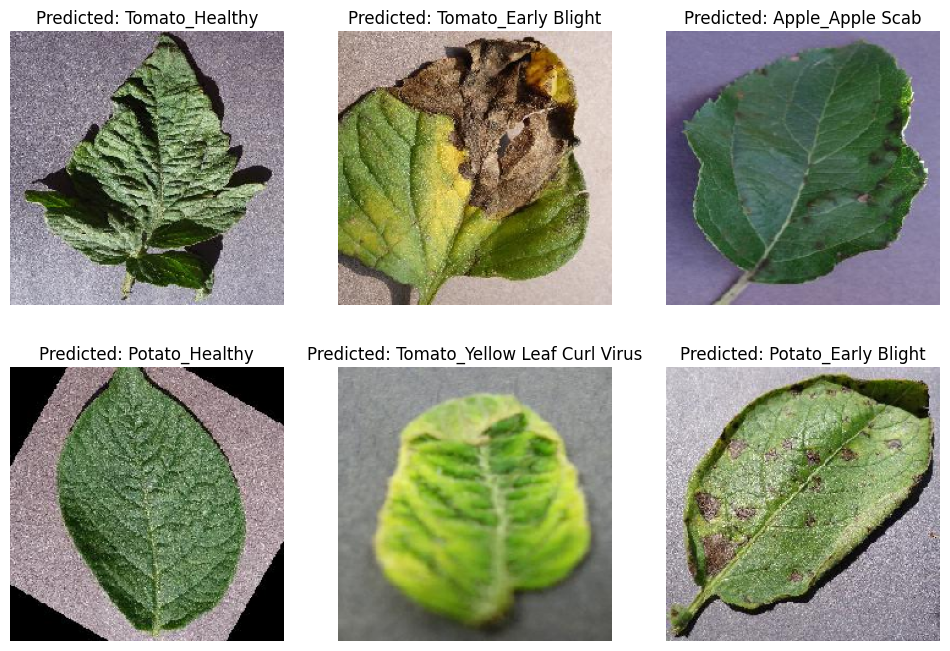

In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


test_images = random.sample(test_generator.filenames, 6)


selected_images = []
predicted_labels = []


for img_path in test_images:
    # Load the image from the test dataset
    img_full_path = test_dir + '/' + img_path 
    img = image.load_img(img_full_path, target_size=(img_height, img_width))  
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  
    # Make a prediction 
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)

    # Get the class label
    class_labels = list(test_generator.class_indices.keys())
    predicted_class_label = class_labels[predicted_class_index[0]]
    
    # Store the image and its prediction
    selected_images.append(img)
    predicted_labels.append(predicted_class_label)


plt.figure(figsize=(12, 8))
for i, img in enumerate(selected_images):
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

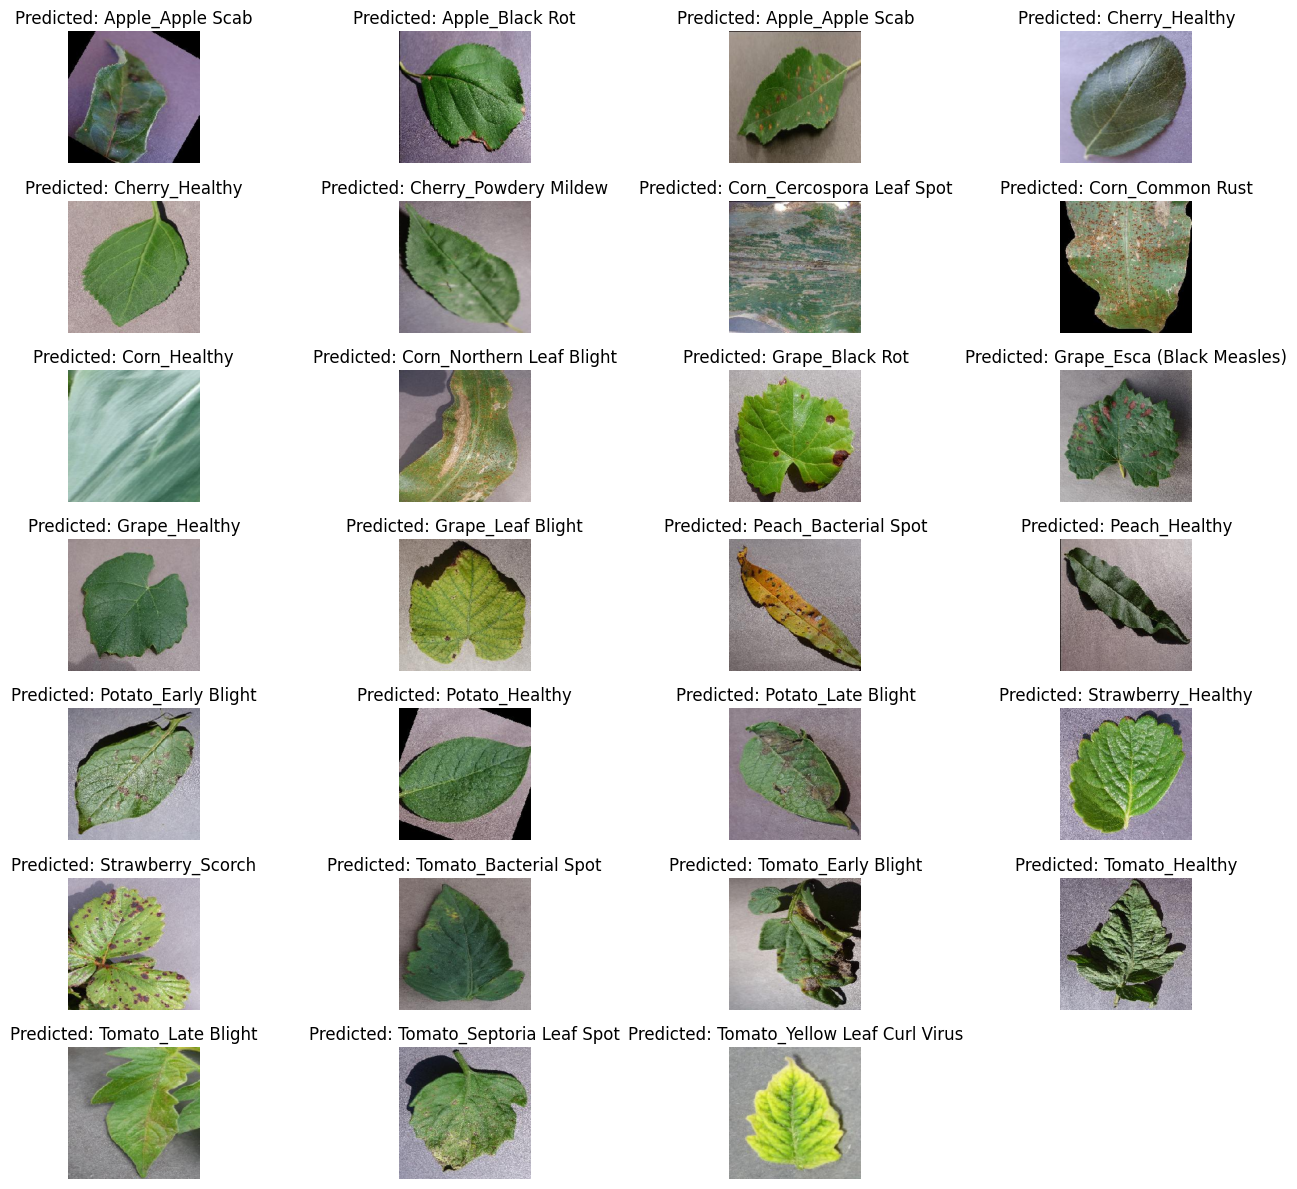

In [23]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


class_images = {}

for img_path in test_generator.filenames:
   
    class_index = img_path.split('/')[0]  
    if class_index not in class_images:
        class_images[class_index] = []
    class_images[class_index].append(img_path)


selected_images = []
predicted_labels = []

for class_name, images in class_images.items():
    
    img_path = random.choice(images)
    img_full_path = test_dir + '/' + img_path  
    img = image.load_img(img_full_path, target_size=(img_height, img_width))  
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  

    
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)

    # Get the class label
    class_labels = list(test_generator.class_indices.keys())
    predicted_class_label = class_labels[predicted_class_index[0]]
    
    
    selected_images.append(img)
    predicted_labels.append(predicted_class_label)

plt.figure(figsize=(14, 12))
for i, img in enumerate(selected_images):
    plt.subplot(7, 4, i+1)  
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [24]:
model.save('/kaggle/working/my_model.h5') 